# Malignant Comments Classifier Project

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Project Description

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is aproblem across multiple platforms, there is a lack of models for online hate detection.

Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 
The label can be either 0 or 1, where 0denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.
The data set includes:
-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful.
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID:It includes unique Ids associated with each comment text given. 
-	Comment text: This column contains the comments extracted from various social media platforms. 

Since there are multiple lables, this is a Multi-label problem.


In [2]:
# Importing the dataset
df=pd.read_csv('C:/Users/Lenovo-PC/Desktop/Internship/Assignment_12_MalignantComments/Malignant-Comments-Classifier-Project--1-/Malignant Comments Classifier Project/train.csv')
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
# Checking the shape
df.shape

(159571, 8)

Dataset has 159571 rows and 8 columns.

In [4]:
# Checking datatypes
df.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

Here, we can see independent columns are of type object and target columns are of int type i.e. both categorical and numeric columns are there in the dataset.

In [5]:
# Checking dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


It gives dataset summary like RangeIndex, Data columns, datatypes. We can see there are no null values in the dataset. 'id' is irrelevant column which can be dropped.

In [6]:
# Statistical summary
df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Exploratory Data Analysis

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


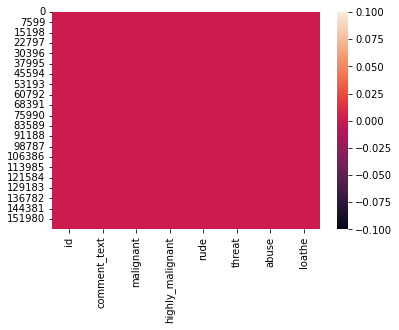

In [7]:
# Checking null values
print(df.isnull().sum())
print(sns.heatmap(df.isnull()))

There are no null values in the dataset.

In [8]:
# Checking for the number of unique values
for i in df.columns :
    print(i,'-->', df[i].nunique())
    #print(df[i].value_counts())

id --> 159571
comment_text --> 159571
malignant --> 2
highly_malignant --> 2
rude --> 2
threat --> 2
abuse --> 2
loathe --> 2


id has all unique values and doesn't seem to be required so we can drop it.

In [9]:
# Dropping the id column
df.drop('id',axis=1,inplace=True)
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [10]:
# Checking the skewness
df.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

Skewness seem high as per the kind of data distribution but since this is multilable problem we are not supposed to treat target columns.

                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   

                    loathe  
malignant         0.266009  
highly_malignant  0.201600  
rude              0.286867  
threat            0.115128  
abuse             0.337736  
loathe            1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


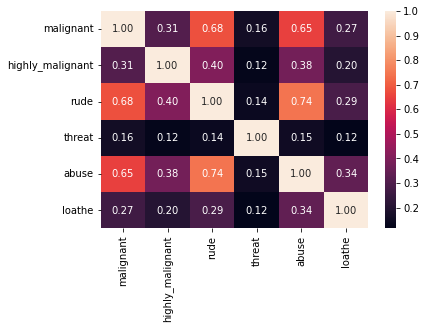

In [11]:
# Checking the correlation
print(df.corr())
print(sns.heatmap(df.corr(),fmt='.2f',annot=True))

Malignant has high positive correlation with rude and abuse. highly_malignant has good correlation with malignant, rude and abuse. rude has high positive linear correlation with abuse. loathe has good positive correlation with malignant, highly_malignant, rude and abuse.

malignant
0    144277
1     15294
Name: malignant, dtype: int64


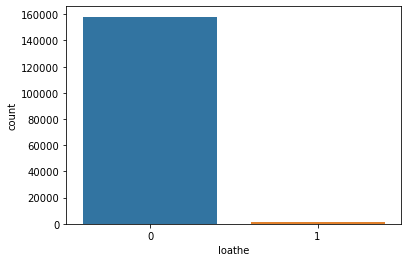

highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64


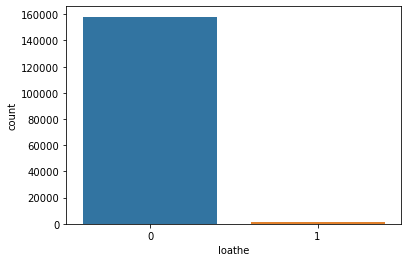

loathe
0    158166
1      1405
Name: loathe, dtype: int64


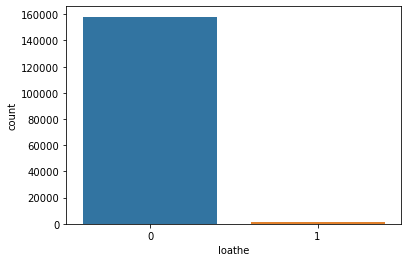

rude
0    151122
1      8449
Name: rude, dtype: int64


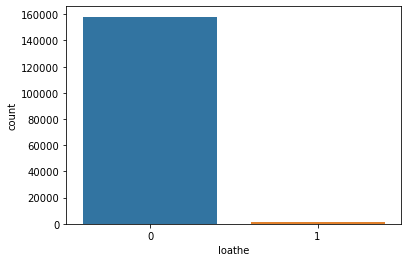

abuse
0    151694
1      7877
Name: abuse, dtype: int64


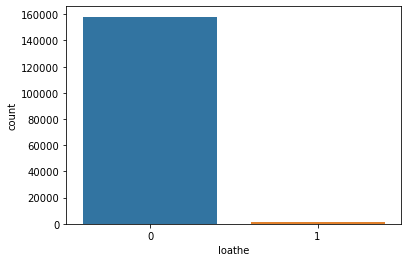

threat
0    159093
1       478
Name: threat, dtype: int64


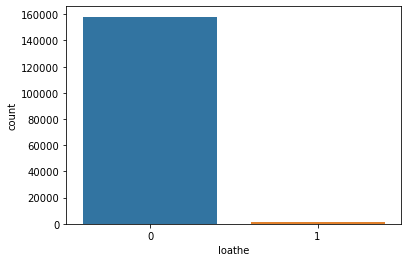

In [12]:
# Checking for the value counts of each label
targets=['malignant','highly_malignant','loathe','rude','abuse','threat']
for t in targets:
    print(t)
    print(df[t].value_counts())
    sns.countplot(df[i])
    plt.show()

For all the labels 'malignant','highly_malignant','loathe','rude','abuse','threat' count of 0 is leading to 1 comparatively.

### Data Cleaning

In [22]:
# Importing required NLP libraries
import re
import nltk
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import  stopwords
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
# Adding a original length column 
df['comment_length'] = df['comment_text'].str.len()
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment_length
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,264
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,112
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,233
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,67


In [24]:
# Coverting the text to lower case
df['comment_text']=df['comment_text'].str.lower()
df['comment_text']

0         explanation\nwhy the edits made under my usern...
1         d'aww! he matches this background colour i'm s...
2         hey man, i'm really not trying to edit war. it...
3         "\nmore\ni can't make any real suggestions on ...
4         you, sir, are my hero. any chance you remember...
                                ...                        
159566    ":::::and for the second time of asking, when ...
159567    you should be ashamed of yourself \n\nthat is ...
159568    spitzer \n\numm, theres no actual article for ...
159569    and it looks like it was actually you who put ...
159570    "\nand ... i really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [35]:
#df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
#df['comment_text']
regexp_tokenize(df['comment_text'][8],"[^0-9]+")

["sorry if the word 'nonsense' was offensive to you. anyway, i'm not intending to write anything in the article(wow they would jump on me for vandalism), i'm merely requesting that it be more encyclopedic so one can use it for school as a reference. i have been to the selective breeding page but it's almost a stub. it points to 'animal breeding' which is a short messy article that gives you no info. there must be someone around with expertise in eugenics? ",
 '.',
 '.',
 '.']

In [36]:
# Replace email addresses with 'email'
df['comment_text'] = df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')
df['comment_text']

0         explanation\nwhy the edits made under my usern...
1         d'aww! he matches this background colour i'm s...
2         hey man, i'm really not trying to edit war. it...
3         "\nmore\ni can't make any real suggestions on ...
4         you, sir, are my hero. any chance you remember...
                                ...                        
159566    ":::::and for the second time of asking, when ...
159567    you should be ashamed of yourself \n\nthat is ...
159568    spitzer \n\numm, theres no actual article for ...
159569    and it looks like it was actually you who put ...
159570    "\nand ... i really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [37]:
# Replace URLs with 'webaddress'
df['comment_text'] = df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

In [38]:
# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['comment_text'] = df['comment_text'].str.replace(r'£|\$', 'dollers')

In [39]:
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['comment_text'] = df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
df['comment_text']

0         explanation\nwhy the edits made under my usern...
1         d'aww! he matches this background colour i'm s...
2         hey man, i'm really not trying to edit war. it...
3         "\nmore\ni can't make any real suggestions on ...
4         you, sir, are my hero. any chance you remember...
                                ...                        
159566    ":::::and for the second time of asking, when ...
159567    you should be ashamed of yourself \n\nthat is ...
159568    spitzer \n\numm, theres no actual article for ...
159569    and it looks like it was actually you who put ...
159570    "\nand ... i really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [40]:
# Replace numbers with 'numbr'
df['comment_text'] = df['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [42]:
# Removing punctuations
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))
df['comment_text']

0         explanation why the edits made under my userna...
1         d'aww! he matches this background colour i'm s...
2         hey man, i'm really not trying to edit war. it...
3         more i can't make any real suggestions on impr...
4         you, sir, are my hero. any chance you remember...
                                ...                        
159566    ":::::and for the second time of asking, when ...
159567    you should be ashamed of yourself that is a ho...
159568    spitzer umm, theres no actual article for pros...
159569    and it looks like it was actually you who put ...
159570    and ... i really don't think you understand. i...
Name: comment_text, Length: 159571, dtype: object

In [23]:
# Removing stop words
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [43]:
# Lemmatisation
lem=WordNetLemmatizer()
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [44]:
# Cleaned text data
df['clean_length'] = df.comment_text.str.len()
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment_length,clean_length
0,explanation why the edits made under my userna...,0,0,0,0,0,0,264,262
1,d'aww! he match this background colour i'm see...,0,0,0,0,0,0,112,119
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,233,233
3,more i can't make any real suggestion on impro...,0,0,0,0,0,0,622,603
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,67,67


In [45]:
# Total length removal
print ('Origian Length', df.comment_length.sum())
print ('Clean Length', df.clean_length.sum())

Origian Length 62893157
Clean Length 61925248


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc,f1_score

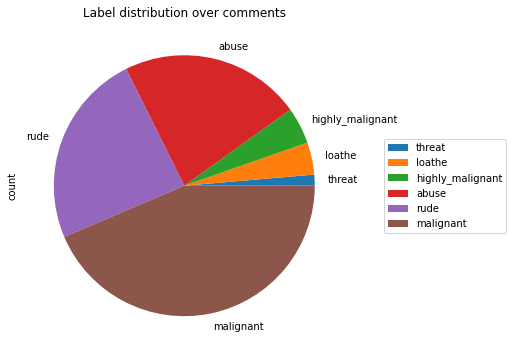

In [58]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = df[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(6, 6))\
                            .legend(loc='center', bbox_to_anchor=(1.3, 0.5))

In [88]:
# Converting the multilabel dataset into single label for easy classification
target_data = df[cols_target]
df['bad_cmnt'] =df[cols_target].sum(axis =1)
#print(df['bad'].value_counts())
df['bad_cmnt'] = df['bad_cmnt'] > 0 
#df[df['bad_cmnt']==True]
df['bad_cmnt'] = df['bad_cmnt'].astype(int)
#df['bad_cmnt'].dtype
print(df['bad_cmnt'].value_counts())

0    143346
1     16225
Name: bad_cmnt, dtype: int64


Multilabel dataset is converted into single label dataset for convenient training and classification

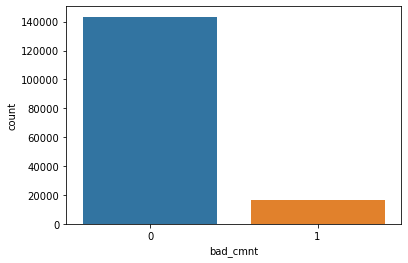

In [89]:
sns.countplot(x="bad_cmnt" , data=df)
plt.show()

In [92]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_idf.fit_transform(df['comment_text'])
features

<159571x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 3515809 stored elements in Compressed Sparse Row format>

In [93]:
# Splitting data in x and y
x = features
y = df['bad_cmnt']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=31,test_size=.30)
y_train.shape,y_test.shape

((111699,), (47872,))

In [94]:
# Making instance of classifiers
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
xg=GradientBoostingClassifier()

In [98]:
#Executing all algorithms in a single for loop

algo_list=[lr,dtc,rf,xg]
for i in algo_list :
    print(i)
    i.fit(x_train,y_train)
    predtrain=i.predict(x_train)
    predtest=i.predict(x_test)
    acctrain=accuracy_score(y_train,predtrain)
    acctest=accuracy_score(y_test,predtest)
    #err=mean_absolute_error(y_test,predtest)
    
    print('Accuracy(Training) : ',acctrain*100,' Accuracy(Test) ',acctest*100)
    print(confusion_matrix(y_test,predtest))
    print(classification_report(y_test,predtest))
    print('\n')

LogisticRegression()
Accuracy(Training) :  95.96236313664402  Accuracy(Test)  95.4879679144385
[[42729   222]
 [ 1938  2983]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42951
           1       0.93      0.61      0.73      4921

    accuracy                           0.95     47872
   macro avg       0.94      0.80      0.85     47872
weighted avg       0.95      0.95      0.95     47872



DecisionTreeClassifier()
Accuracy(Training) :  99.8800347362107  Accuracy(Test)  94.08004679144385
[[41625  1326]
 [ 1508  3413]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     42951
           1       0.72      0.69      0.71      4921

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.84     47872
weighted avg       0.94      0.94      0.94     47872



RandomForestClassifier()
Accuracy(Training) :  99.8800347362107  Accuracy(Test)  95.52

In [99]:
# Computing cross validation score of all the models used
from sklearn.model_selection import cross_val_score

for i in algo_list :
    print('CV mean of ',i,' is ',cross_val_score(i,x,y,cv=5).mean())

CV mean of  LogisticRegression()  is  0.9561261060257203
CV mean of  DecisionTreeClassifier()  is  0.9404465746013264
CV mean of  RandomForestClassifier()  is  0.9568593283231388
CV mean of  GradientBoostingClassifier()  is  0.9397008205832353


Looking at difference of accuracy and cv mean, opting for RandomForestClassifier as our best model with accuracy of 96% and having least difference between accuracy and cv mean.

### Hyperparameter Tuning

In [ ]:
# Using hyper parameter tuning on selected model for better accuracy and to avoid overfitting issues
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['gini', 'entropy'],
              'max_features':['auto', 'sqrt', 'log2'],
              'class_weight':['balanced','balanced_subsample',None],
              'min_samples_leaf':[1,2,3]}
              #'verbose':[0,1,2,3,4,5],
              #'n_estimators':[10,50,100]}

rf=RandomForestClassifier()
GCV=GridSearchCV(rf,parameters,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

In [ ]:
rf=RandomForestClassifier(class_weight='balanced',criterion='entropy',max_features='auto',min_samples_leaf=1)
rf.fit(trainx,trainy)
pred=rf.predict(x_test)
acc=accuracy_score(y_test,pred)
cv=cross_val_score(rf,x,y,cv=5).mean()

print('Accuracy : ',acc,' CV mean : ',cv)

#### We are getting model accuracy as approx 96% and cv mean as 0.97 for the parameter set, this shows our model is performing good.

### AUC-ROC Curve

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rf=RandomForestClassifier(class_weight='balanced',criterion='entropy',max_features='auto',min_samples_leaf=1)
rf.fit(trainx,trainy)
pred=rf.predict(x_test)
acc1=accuracy_score(y_test,pred)

Applying AUC-ROC curve on selected model i.e. RandomForestClassifier()

In [ ]:
pred_proba=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_proba)
#print(fpr,tpr,thresholds)

Calculating fpr,tpr,thresholds for selected model

In [ ]:
# Plotting the curve

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RandomForestClassifier')
plt.show()

In [ ]:
auc_score=roc_auc_score(y_test,pred_proba)
print('Accuracy : ',acc1)
print('ROC_AUC score : ',auc_score)

Getting good accuracy score and AUC-ROC score for the model selected

In [ ]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction
# model is performing good :
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()